# Importing libraries and our dataset

In [17]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('../data/for_modelling/credit_score_train.csv')
df_val = pd.read_csv('../data/for_modelling/credit_score_valid.csv')
df=pd.concat([df_train, df_val]) 
#df=df_train.copy()
df.head()

INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  R_DEBT_SAVINGS  \
0    2783     1855        0            0.6665           0.00          0.0000   
1  314430   445442   707468            1.4167           2.25          1.5882   
2  161773   517674  2782496            3.2000          17.20          5.3750   
3   16014    97685    20818            6.1000           1.30          0.2131   
4  193225  1410542  2589215            7.3000          13.40          1.8356   

   T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  R_CLOTHING_INCOME  ...  \
0            103            74      0.7184             0.0370  ...   
1          35861         29157      0.8131             0.1141  ...   
2           3716          2533      0.6816             0.0230  ...   
3            637           187      0.2936             0.0398  ...   
4           5276          2325      0.4407             0.0273  ...   

   R_EXPENDITURE_SAVINGS  R_EXPENDITURE_DEBT  CAT_GAMBLING  CAT_DEBT  \
0                 2.5003              0.0000            No         0   
1                 0.5882              0.3704          High         1   
2                 0.3125              0.0581            No         1   
3                 0.1639              0.7692            No         1   
4                 0.1370              0.0746            No         1   

   CAT_CREDIT_CARD  CAT_MORTGAGE  CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  \
0                0             0                    1               0   
1                0             1                    1               0   
2                1             1                    1               1   
3                0             0                    1               0   
4                1             0                    1               1   

   CREDIT_SCORE  DEFAULT  
0           570        0  
1           691        0  
2           520        0  
3           654        0  
4           552        0  

[5 rows x 86 columns]

In [18]:
# let's set our target and look into it
target='DEFAULT'
df[target].value_counts()

DEFAULT
0    450
1    178
Name: count, dtype: int64

# Missing values

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 628 entries, 0 to 137
Data columns (total 86 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCOME                   628 non-null    int64  
 1   SAVINGS                  628 non-null    int64  
 2   DEBT                     628 non-null    int64  
 3   R_SAVINGS_INCOME         628 non-null    float64
 4   R_DEBT_INCOME            628 non-null    float64
 5   R_DEBT_SAVINGS           628 non-null    float64
 6   T_CLOTHING_12            628 non-null    int64  
 7   T_CLOTHING_6             628 non-null    int64  
 8   R_CLOTHING               628 non-null    float64
 9   R_CLOTHING_INCOME        628 non-null    float64
 10  R_CLOTHING_SAVINGS       628 non-null    float64
 11  R_CLOTHING_DEBT          628 non-null    float64
 12  T_EDUCATION_12           628 non-null    int64  
 13  T_EDUCATION_6            628 non-null    int64  
 14  R_EDUCATION              628 no

There are no missing values in our dataset :))

# Categorical variables
In our dataset there is only one categorical variable - 'CAT_GAMBLING'.

In [20]:
df['CAT_GAMBLING'].value_counts()

CAT_GAMBLING
No      392
High    163
Low      73
Name: count, dtype: int64

We will use ordinal encoding for this variable

In [21]:
df['CAT_GAMBLING'] = df['CAT_GAMBLING'].map({'No': 0, 'Low': 1,'High': 2})
df

INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
0      2783     1855        0            0.6665         0.0000   
1    314430   445442   707468            1.4167         2.2500   
2    161773   517674  2782496            3.2000        17.2000   
3     16014    97685    20818            6.1000         1.3000   
4    193225  1410542  2589215            7.3000        13.4000   
..      ...      ...      ...               ...            ...   
133  386976  1250231   654883            3.2308         1.6923   
134   16772     8386        0            0.5000         0.0000   
135  137509   206264   206264            1.5000         1.5000   
136  259146  1922000  1662854            7.4167         6.4167   
137   56657   442952    51506            7.8181         0.9091   

     R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  \
0            0.0000            103            74      0.7184   
1            1.5882          35861         29157      0.8131   
2            5.3750           3716          2533      0.6816   
3            0.2131            637           187      0.2936   
4            1.8356           5276          2325      0.4407   
..              ...            ...           ...         ...   
133          0.5238          36665         30569      0.8337   
134          0.0000            238           186      0.7815   
135          1.0000          15661         10865      0.6938   
136          0.8652          12180          8527      0.7001   
137          0.1163           1085           289      0.2664   

     R_CLOTHING_INCOME  ...  R_EXPENDITURE_SAVINGS  R_EXPENDITURE_DEBT  \
0               0.0370  ...                 2.5003              0.0000   
1               0.1141  ...                 0.5882              0.3704   
2               0.0230  ...                 0.3125              0.0581   
3               0.0398  ...                 0.1639              0.7692   
4               0.0273  ...                 0.1370              0.0746   
..                 ...  ...                    ...                 ...   
133             0.0947  ...                 0.2381              0.4545   
134             0.0142  ...                 2.5000              0.9786   
135             0.1139  ...                 0.6667              0.6667   
136             0.0470  ...                 0.1124              0.1299   
137             0.0192  ...                 0.1163              1.0000   

     CAT_GAMBLING  CAT_DEBT  CAT_CREDIT_CARD  CAT_MORTGAGE  \
0               0         0                0             0   
1               2         1                0             1   
2               0         1                1             1   
3               0         1                0             0   
4               0         1                1             0   
..            ...       ...              ...           ...   
133             0         1                0             0   
134             0         0                0             0   
135             0         1                0             0   
136             2         1                1             0   
137             0         1                0             0   

     CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  CREDIT_SCORE  DEFAULT  
0                      1               0           570        0  
1                      1               0           691        0  
2                      1               1           520        0  
3                      1               0           654        0  
4                      1               1           552        0  
..                   ...             ...           ...      ...  
133                    1               0           562        0  
134                    1               0           619        0  
135                    1               0           639        1  
136                    1               1           587        1  
137                    1               0           635        1  

[628 rows x 86 c

# Detecting outliers

In [22]:
#let's prepare dataset without 'DEFAULT', binary variables and 'Cat_gambling' because it was categorical
#we will use it often in the next steps
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
rest_cols = [col for col in df.columns if col not in binary_cols]
rest_cols.remove('CAT_GAMBLING')

### boxplot

In [23]:
# for col in rest_cols:
#     sns.boxplot(x=df[col])
#     plt.show()

### PyOD

In [24]:
from pyod.models.knn import KNN
clf = KNN(contamination=0.04)
clf.fit(df[rest_cols])
df['outliers'] = clf.labels_
df['outliers'].value_counts()

outliers
0    602
1     26
Name: count, dtype: int64

This is automatic detection of outliers. We can see that 4% of our data is classified as outliers. Let's check if we can find some outliers manually.

### scatter plot

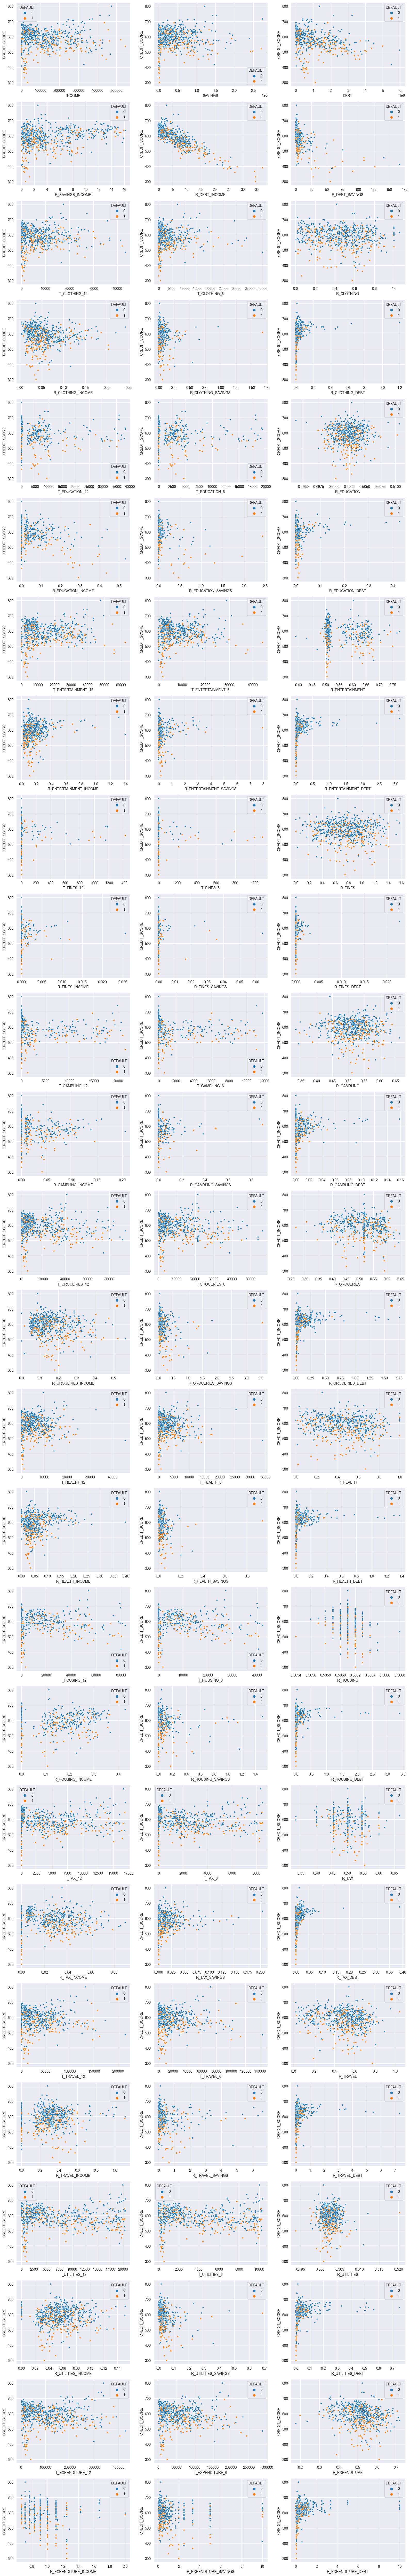

In [25]:
# we are showing scatterplots for all features except 'DEFAULT', binary variables and 'Cat_gambling' because it was categorical
df_without_binary = [col for col in df.columns if df[col].nunique() > 2]
columns_to_scatter_plot = [col for col in df_without_binary if col not in ['CREDIT_SCORE', 'CAT_GAMBLING', 'DEFAULT']]

fig, axs = plt.subplots(26, 3, figsize=(16, 100)) 
axs = axs.flatten()
for i, col in enumerate(columns_to_scatter_plot):
    sns.scatterplot(data=df, x=col, y="CREDIT_SCORE", ax=axs[i], s=15, hue='DEFAULT')

plt.tight_layout() 
plt.show()

Outliers:
- 'T_CLOTHING_6' - above 37000 (there is only one observation)
- 'R_CLOTHING_SAVINGS' - above 1.50 (there is only one observation)
- 'R_CLOTHING_DEBT' - above 1.0 (there is only one observation)
- 'R_EDUCATION_SAVINGS' - above 1.7 (there is only two observation)
- 'R_EDUCATION_DEBT' - above 0.3 (there is only two observation)
- 'R_ENTERAINMENT_INCOME' - above 1.2 (there is only two observation)
- 'R_ENTERAINMENT_SAVINGS' - above 6 (there is only one observation)
- 'R_ENTERAINMENT_DEBT' - above 2.0 (there is only two observation)
- 'R_FINES_INCOME' - above 0.02 (there is only one observation)
- 'R_FINES_SAVINGS' - above 0.05 (there is only one observation)
- 'R_FINES_DEBT' - above 0.02 (there is only one observation)
- 'R_GAMBLING_INCOME' - above 0.2 (there is only one observation)
- 'R_GAMBLING_SAVINGS' - above 0.8 (there is only two observation)
- 'R_GAMBLING_DEBT' - above 0.15 (there is only one observation)
- 'R_GROCERIES_SAVINGS' - above 3.5 (there is only one observation)
- 'T_HEALTH_12' - above 40000 (there is only one observation)
- 't_health_6' - above 25000 (there is only two observation)
- 'R_HEALTH_INCOME' - above 0.3 (there is only one observation)
- 'R_HEALTH_SAVINGS' - above 0.8 (there is only one observation)
- 'R_HOUSING_DEBT' - above 3 (there is only one observation)
- 'R_TAX_DEBT' - above 0.15 (there is only two observation)

Let's remove these outliers

In [26]:
# Definiowanie granic dla outlierów
outliers_dict = {
    'T_CLOTHING_6': 37000,
    'R_CLOTHING_SAVINGS': 1.50,
    'R_CLOTHING_DEBT': 1.0,
    'R_EDUCATION_SAVINGS': 1.7,
    'R_EDUCATION_DEBT': 0.3,
    'R_ENTERTAINMENT_INCOME': 1.2,
    'R_ENTERTAINMENT_SAVINGS': 6,
    'R_ENTERTAINMENT_DEBT': 2.0,
    'R_FINES_INCOME': 0.02,
    'R_FINES_SAVINGS': 0.05,
    'R_FINES_DEBT': 0.02,
    'R_GAMBLING_INCOME': 0.2,
    'R_GAMBLING_SAVINGS': 0.8,
    'R_GAMBLING_DEBT': 0.15,
    'R_GROCERIES_SAVINGS': 3.5,
    'T_HEALTH_12': 40000,
    'T_HEALTH_6': 25000,
    'R_HEALTH_INCOME': 0.3,
    'R_HEALTH_SAVINGS': 0.8,
    'R_HOUSING_DEBT': 3,
    'R_TAX_DEBT': 0.15
}

for col, threshold in outliers_dict.items():
    df_without_outliers = df[df[col] <= threshold]

df_without_outliers.reset_index(drop=True, inplace=True)
df_without_outliers

INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
0      2783     1855        0            0.6665         0.0000   
1    314430   445442   707468            1.4167         2.2500   
2    161773   517674  2782496            3.2000        17.2000   
3     16014    97685    20818            6.1000         1.3000   
4    193225  1410542  2589215            7.3000        13.4000   
..      ...      ...      ...               ...            ...   
621  386976  1250231   654883            3.2308         1.6923   
622   16772     8386        0            0.5000         0.0000   
623  137509   206264   206264            1.5000         1.5000   
624  259146  1922000  1662854            7.4167         6.4167   
625   56657   442952    51506            7.8181         0.9091   

     R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  \
0            0.0000            103            74      0.7184   
1            1.5882          35861         29157      0.8131   
2            5.3750           3716          2533      0.6816   
3            0.2131            637           187      0.2936   
4            1.8356           5276          2325      0.4407   
..              ...            ...           ...         ...   
621          0.5238          36665         30569      0.8337   
622          0.0000            238           186      0.7815   
623          1.0000          15661         10865      0.6938   
624          0.8652          12180          8527      0.7001   
625          0.1163           1085           289      0.2664   

     R_CLOTHING_INCOME  ...  R_EXPENDITURE_DEBT  CAT_GAMBLING  CAT_DEBT  \
0               0.0370  ...              0.0000             0         0   
1               0.1141  ...              0.3704             2         1   
2               0.0230  ...              0.0581             0         1   
3               0.0398  ...              0.7692             0         1   
4               0.0273  ...              0.0746             0         1   
..                 ...  ...                 ...           ...       ...   
621             0.0947  ...              0.4545             0         1   
622             0.0142  ...              0.9786             0         0   
623             0.1139  ...              0.6667             0         1   
624             0.0470  ...              0.1299             2         1   
625             0.0192  ...              1.0000             0         1   

     CAT_CREDIT_CARD  CAT_MORTGAGE  CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  \
0                  0             0                    1               0   
1                  0             1                    1               0   
2                  1             1                    1               1   
3                  0             0                    1               0   
4                  1             0                    1               1   
..               ...           ...                  ...             ...   
621                0             0                    1               0   
622                0             0                    1               0   
623                0             0                    1               0   
624                1             0                    1               1   
625                0             0                    1               0   

     CREDIT_SCORE  DEFAULT  outliers  
0             570        0         0  
1             691        0         0  
2             520        0         0  
3             654        0         0  
4             552        0         0  
..            ...      ...       ...  
621           562        0         0  
622           619        0         0  
623           639        1         0  
624           587        1         1  
625           635        1         0  

[626 rows x 87 columns]

# Variables transformation

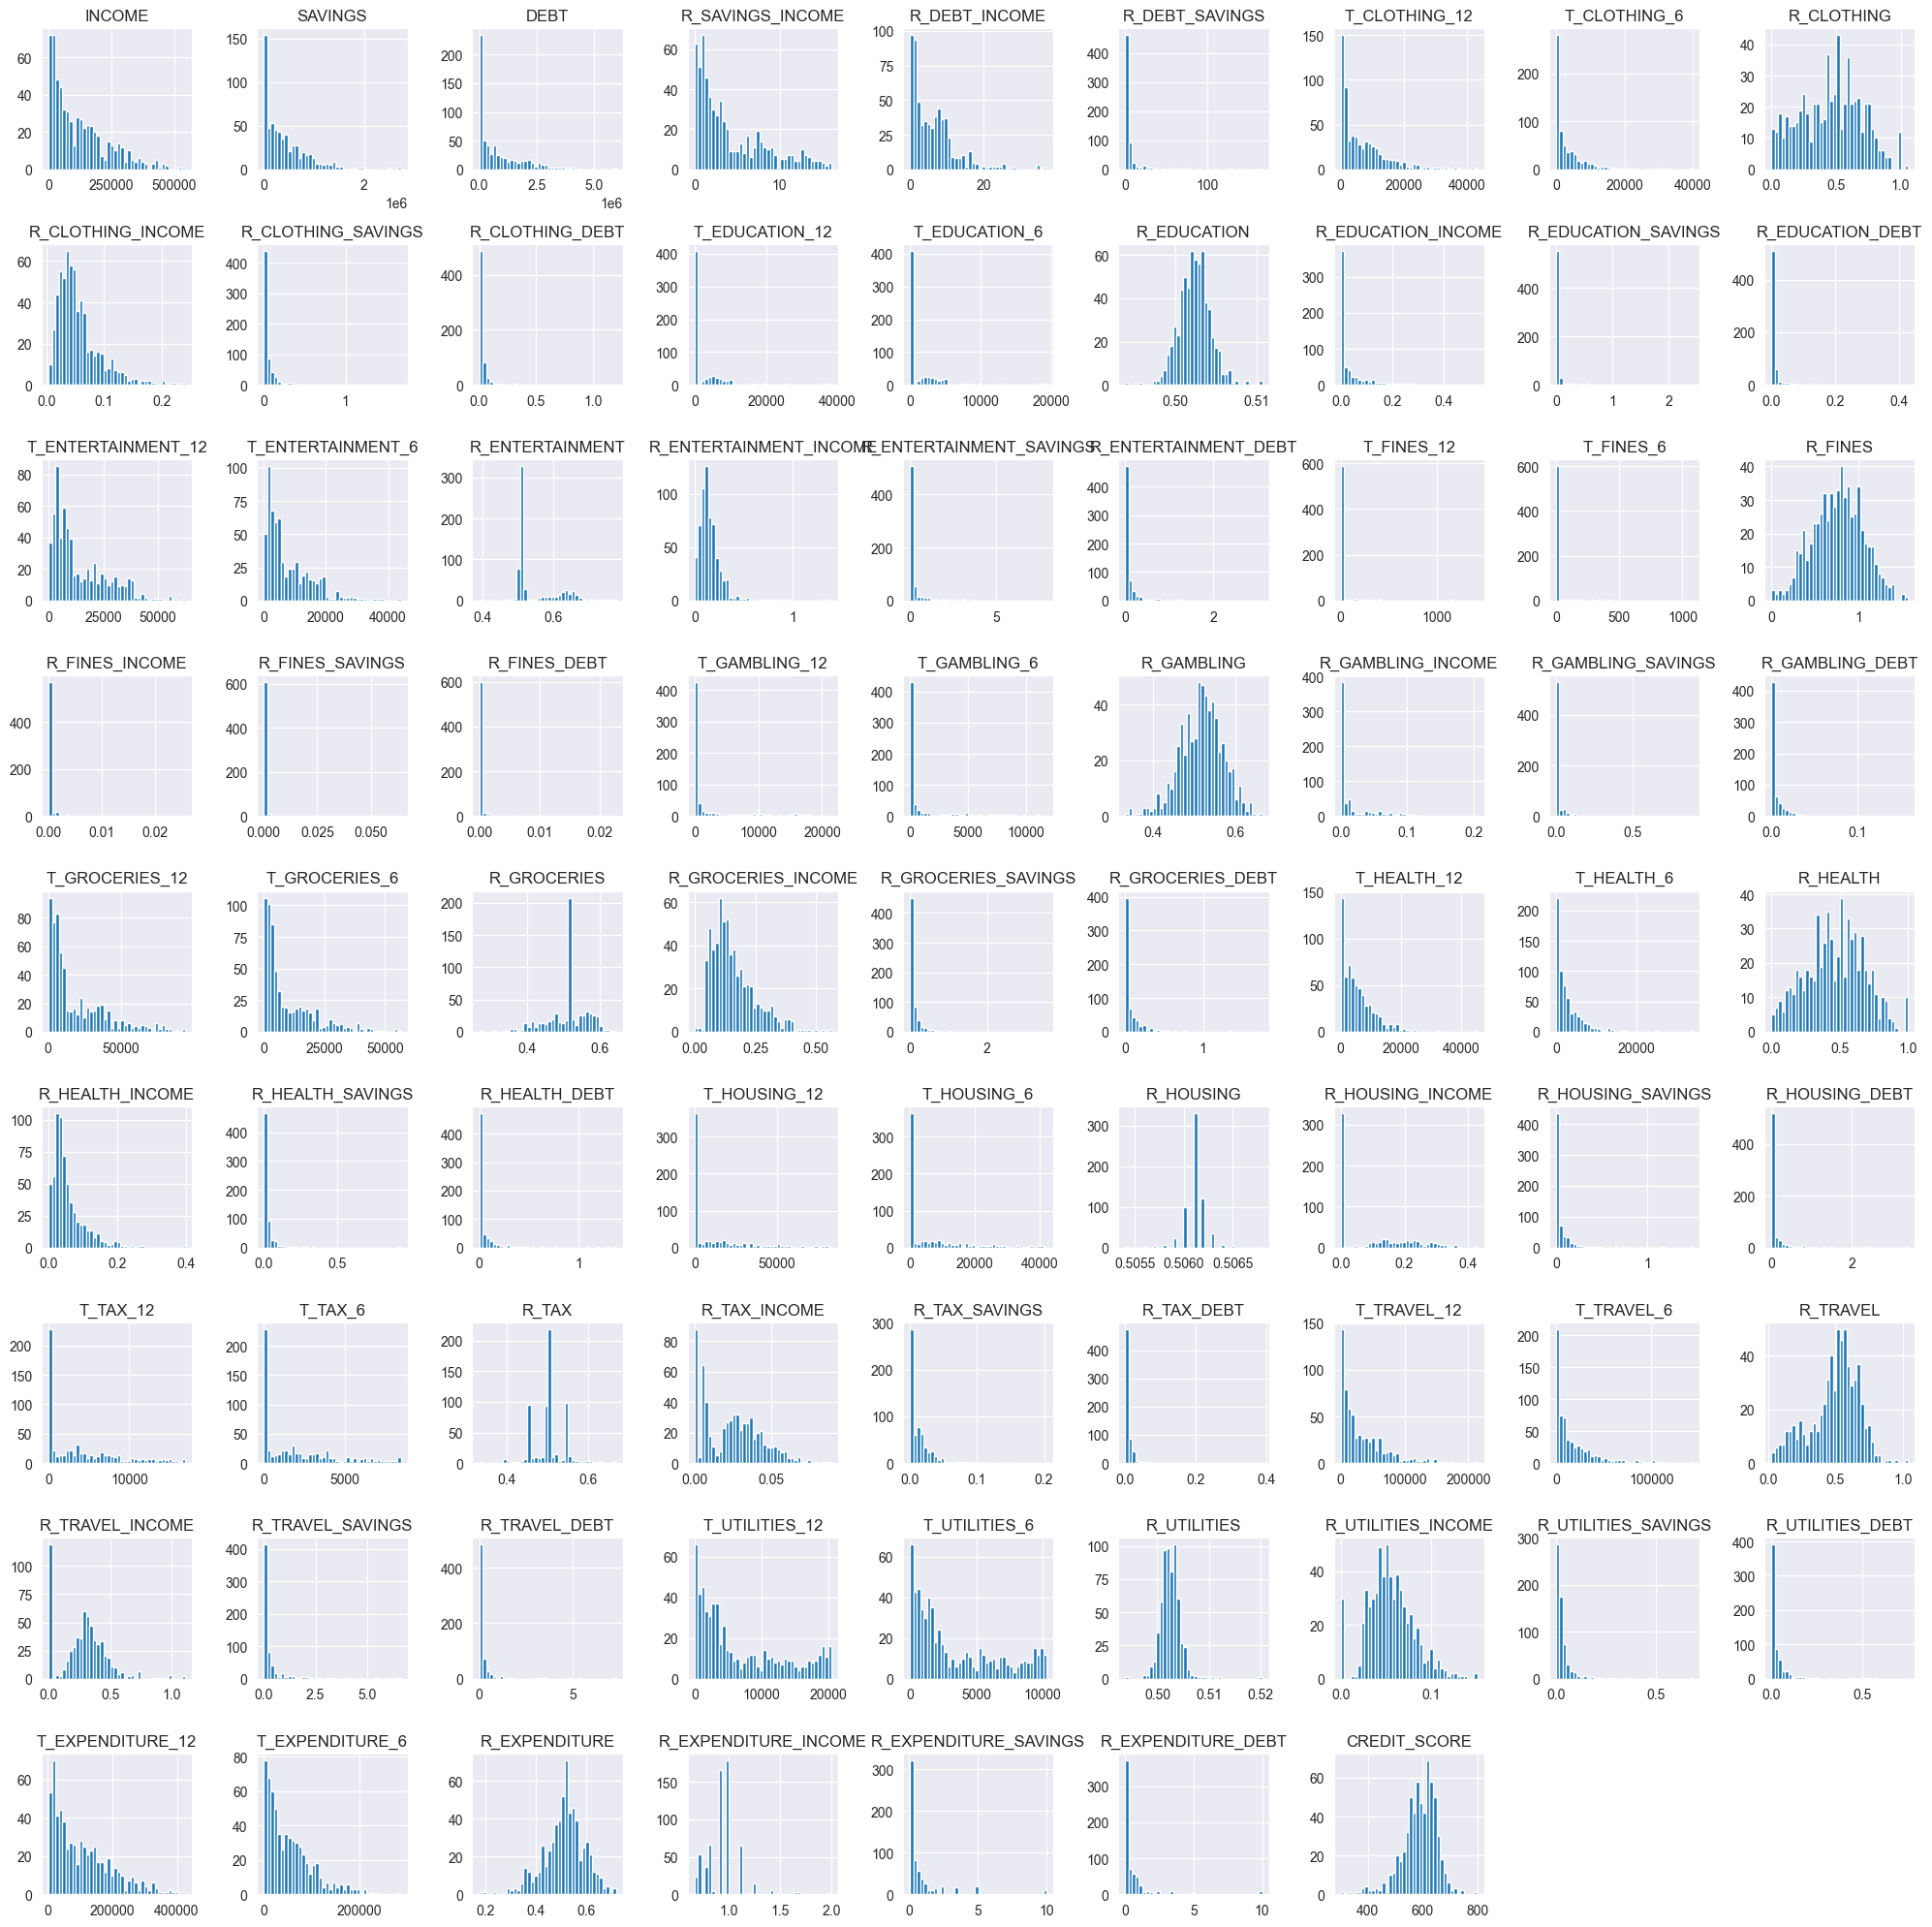

In [27]:
# histograms for our dataset
df[rest_cols].hist(bins=40, figsize=(20, 20))
plt.tight_layout()
plt.show()

Data transformation -Box Cox, standard

In [28]:
# use Box Cox transformation for rest_cols
from scipy.stats import boxcox
df_box_cox=df.copy()
for col in rest_cols:
    df_box_cox[col] = boxcox(df_box_cox[col]+1)[0]
df_box_cox.head()

INCOME     SAVINGS        DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
0   43.459601   28.600123    0.000000          0.495605       0.000000   
1  241.416057  162.327132   94.552153          0.837915       1.265938   
2  190.490817  169.976872  131.672996          1.319896       3.469615   
3   82.849139  101.686796   39.199909          1.749466       0.875886   
4  202.960902  230.871110  129.412824          1.872176       3.142675   

   R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  R_CLOTHING_INCOME  \
0        0.000000       9.924372      7.003166    0.690181           0.027768   
1        0.793731      70.869805     36.115755    0.777806           0.052375   
2        1.316598      34.737136     19.786169    0.655954           0.019159   
3        0.186041      19.314106      9.495216    0.288280           0.029270   
4        0.855484      38.876541     19.351044    0.429239           0.022012   

   ...  R_EXPENDITURE_DEBT  CAT_GAMBLING  CAT_DEBT  CAT_CREDIT_CARD  \
0  ...            0.000000             0         0                0   
1  ...            0.217763             2         1                0   
2  ...            0.052655             0         1                1   
3  ...            0.303274             0         1                0   
4  ...            0.065827             0         1                1   

   CAT_MORTGAGE  CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  CREDIT_SCORE  DEFAULT  \
0             0                    1               0  8.383897e+07        0   
1             1                    1               0  1.506710e+08        0   
2             1                    1               1  6.339584e+07        0   
3             0                    1               0  1.274213e+08        0   
4             0                    1               1  7.603568e+07        0   

   outliers  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 87 columns]

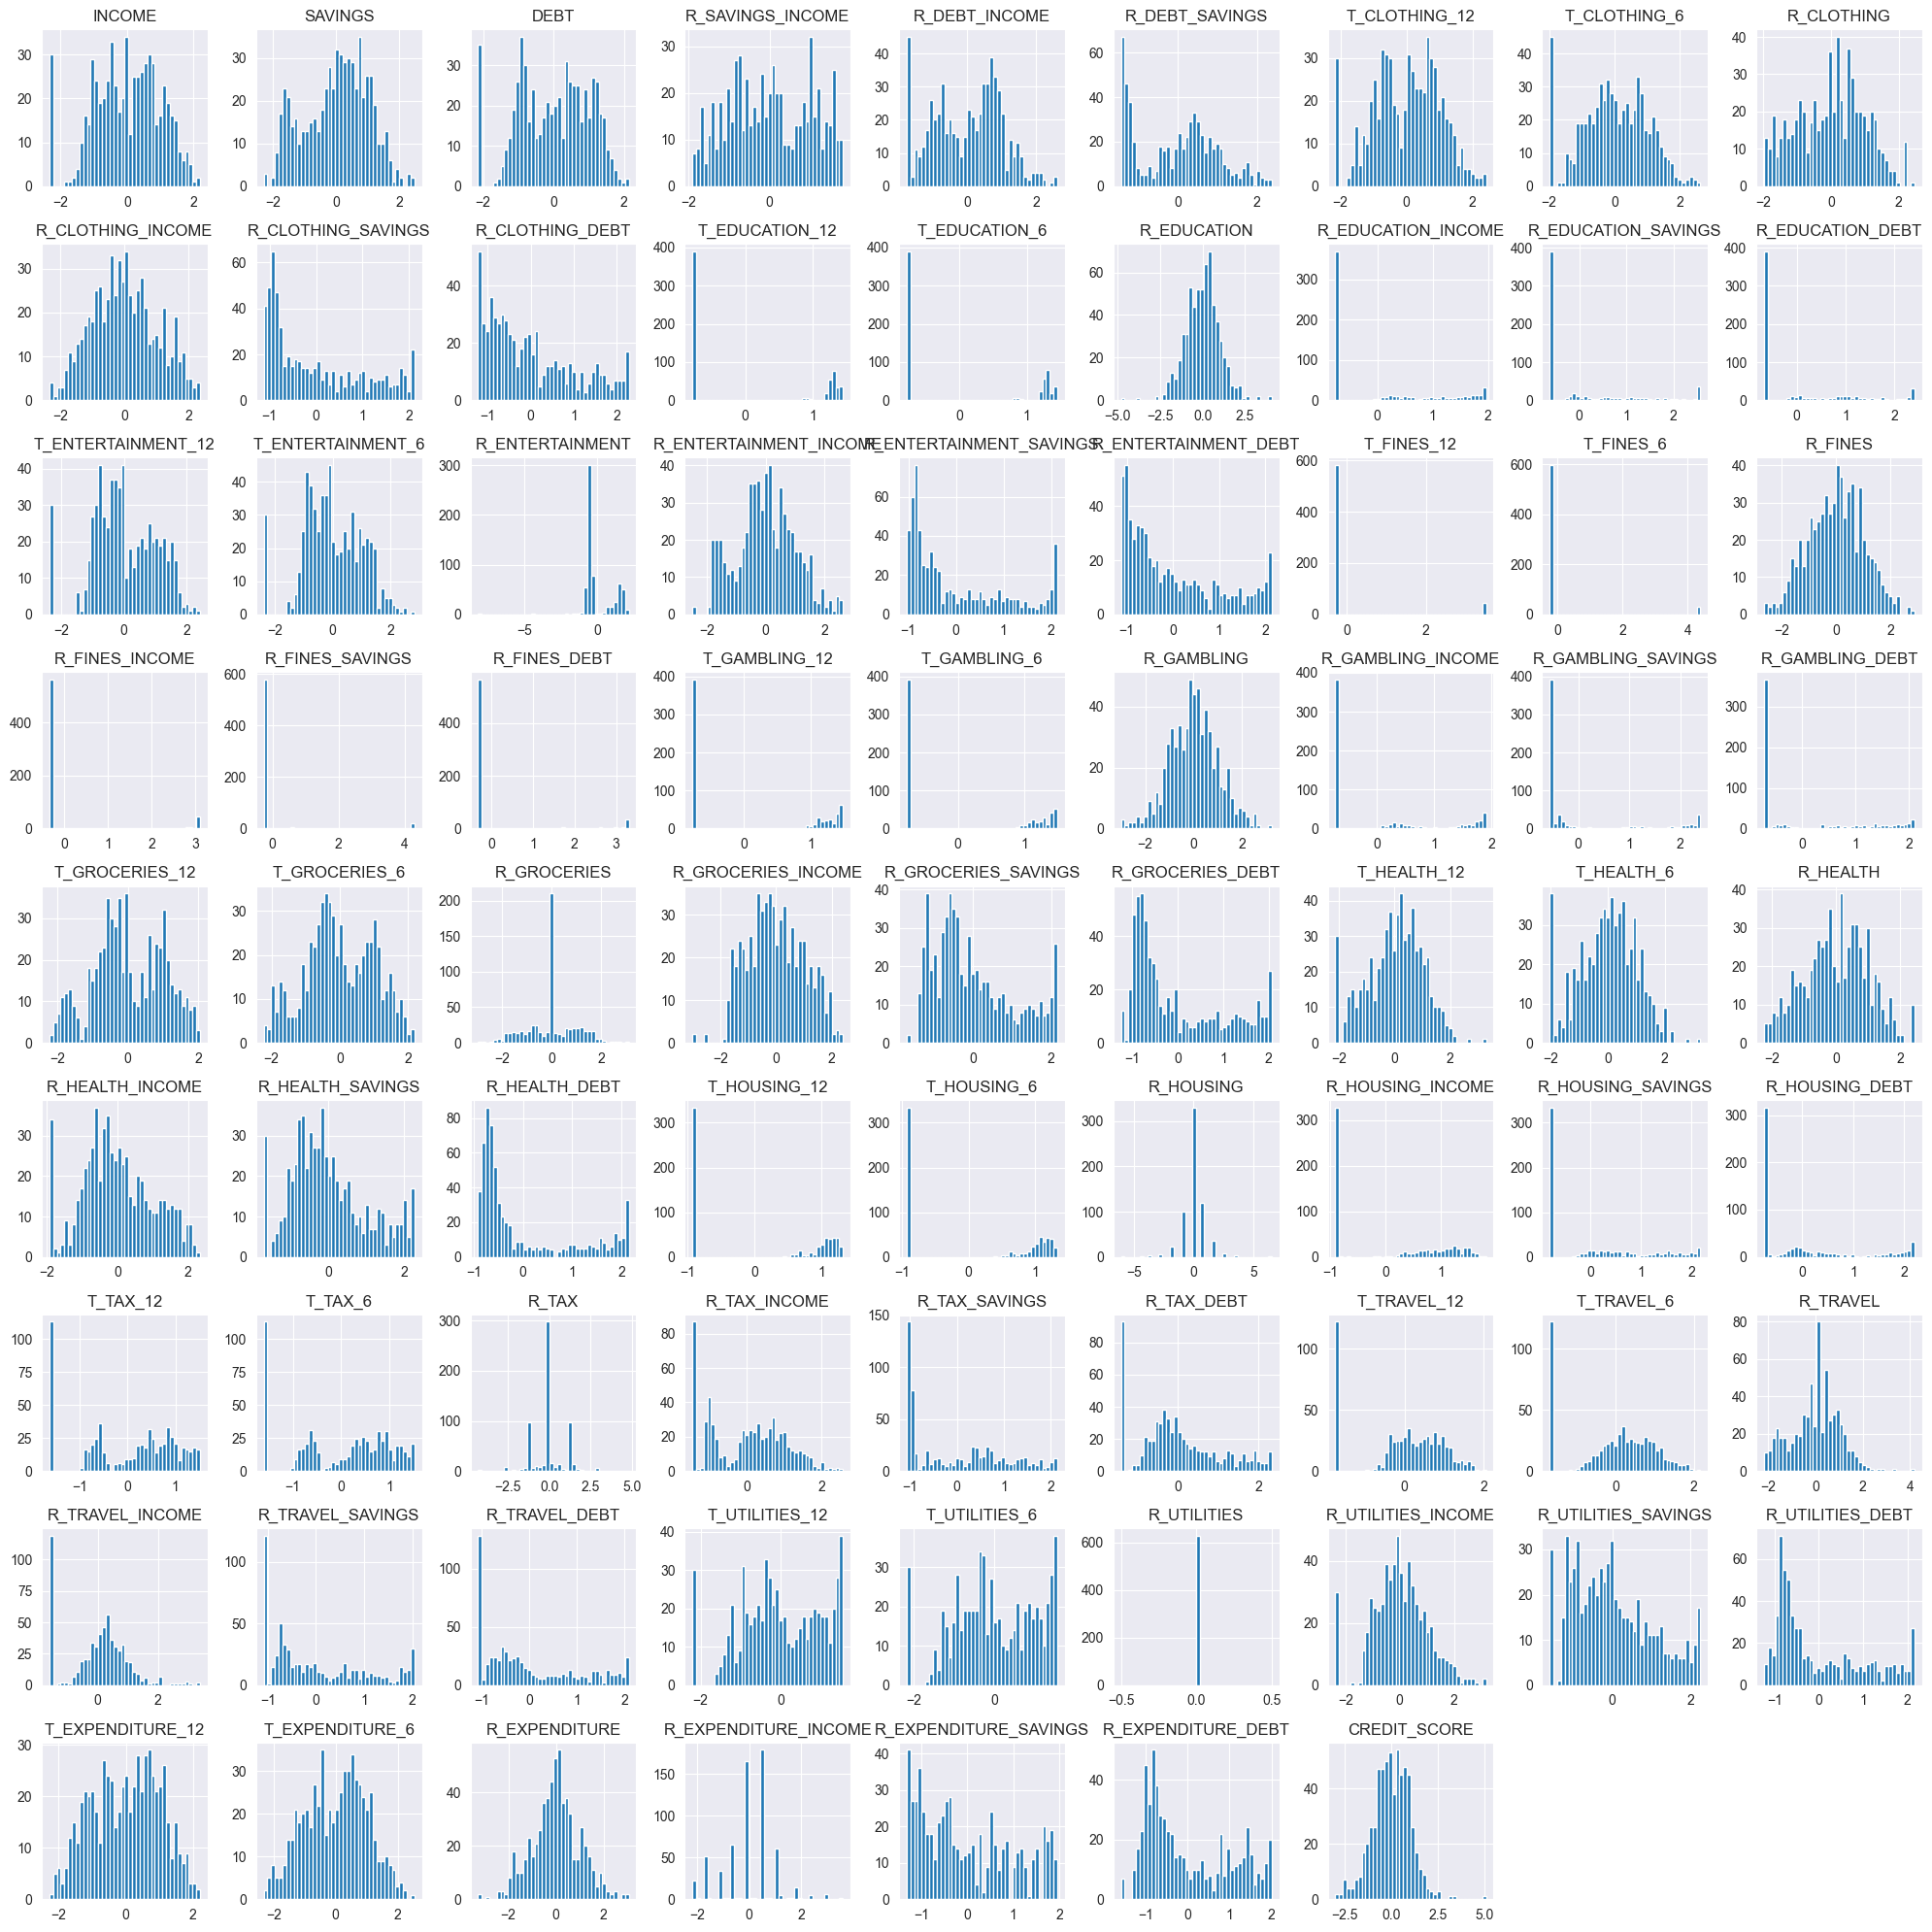

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_box_cox[rest_cols] = scaler.fit_transform(df_box_cox[rest_cols])

# histogram of rest_cols
df_box_cox[rest_cols].hist(bins=40, figsize=(20, 20))
plt.tight_layout()
plt.show()

box cox transformation without outliers

In [30]:
# use Box Cox transformation for rest_cols
from scipy.stats import boxcox
df_box_cox_woo=df_without_outliers.copy()
for col in rest_cols:
    df_box_cox_woo[col] = boxcox(df_box_cox_woo[col]+1)[0]
df_box_cox_woo.head()

INCOME     SAVINGS        DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
0   43.539514   28.811891    0.000000          0.496158       0.000000   
1  242.205425  164.691595   95.550238          0.839518       1.266955   
2  191.073948  172.488174  133.240307          1.323959       3.476710   
3   83.043991  102.956985   39.484341          1.756750       0.876379   
4  203.593486  234.605521  130.943969          1.880567       3.148556   

   R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  R_CLOTHING_INCOME  \
0        0.000000       9.911315      7.005131    0.693785           0.027736   
1        0.794490      70.620484     36.143759    0.782303           0.052229   
2        1.318901      34.646531     19.797235    0.659232           0.019144   
3        0.186079      19.276524      9.498531    0.288968           0.029234   
4        0.856376      38.769820     19.361727    0.430714           0.021992   

   ...  R_EXPENDITURE_DEBT  CAT_GAMBLING  CAT_DEBT  CAT_CREDIT_CARD  \
0  ...            0.000000             0         0                0   
1  ...            0.216475             2         1                0   
2  ...            0.052592             0         1                1   
3  ...            0.300408             0         1                0   
4  ...            0.065727             0         1                1   

   CAT_MORTGAGE  CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  CREDIT_SCORE  DEFAULT  \
0             0                    1               0  8.252999e+07        0   
1             1                    1               0  1.482440e+08        0   
2             1                    1               1  6.242099e+07        0   
3             0                    1               0  1.253868e+08        0   
4             0                    1               1  7.485480e+07        0   

   outliers  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 87 columns]

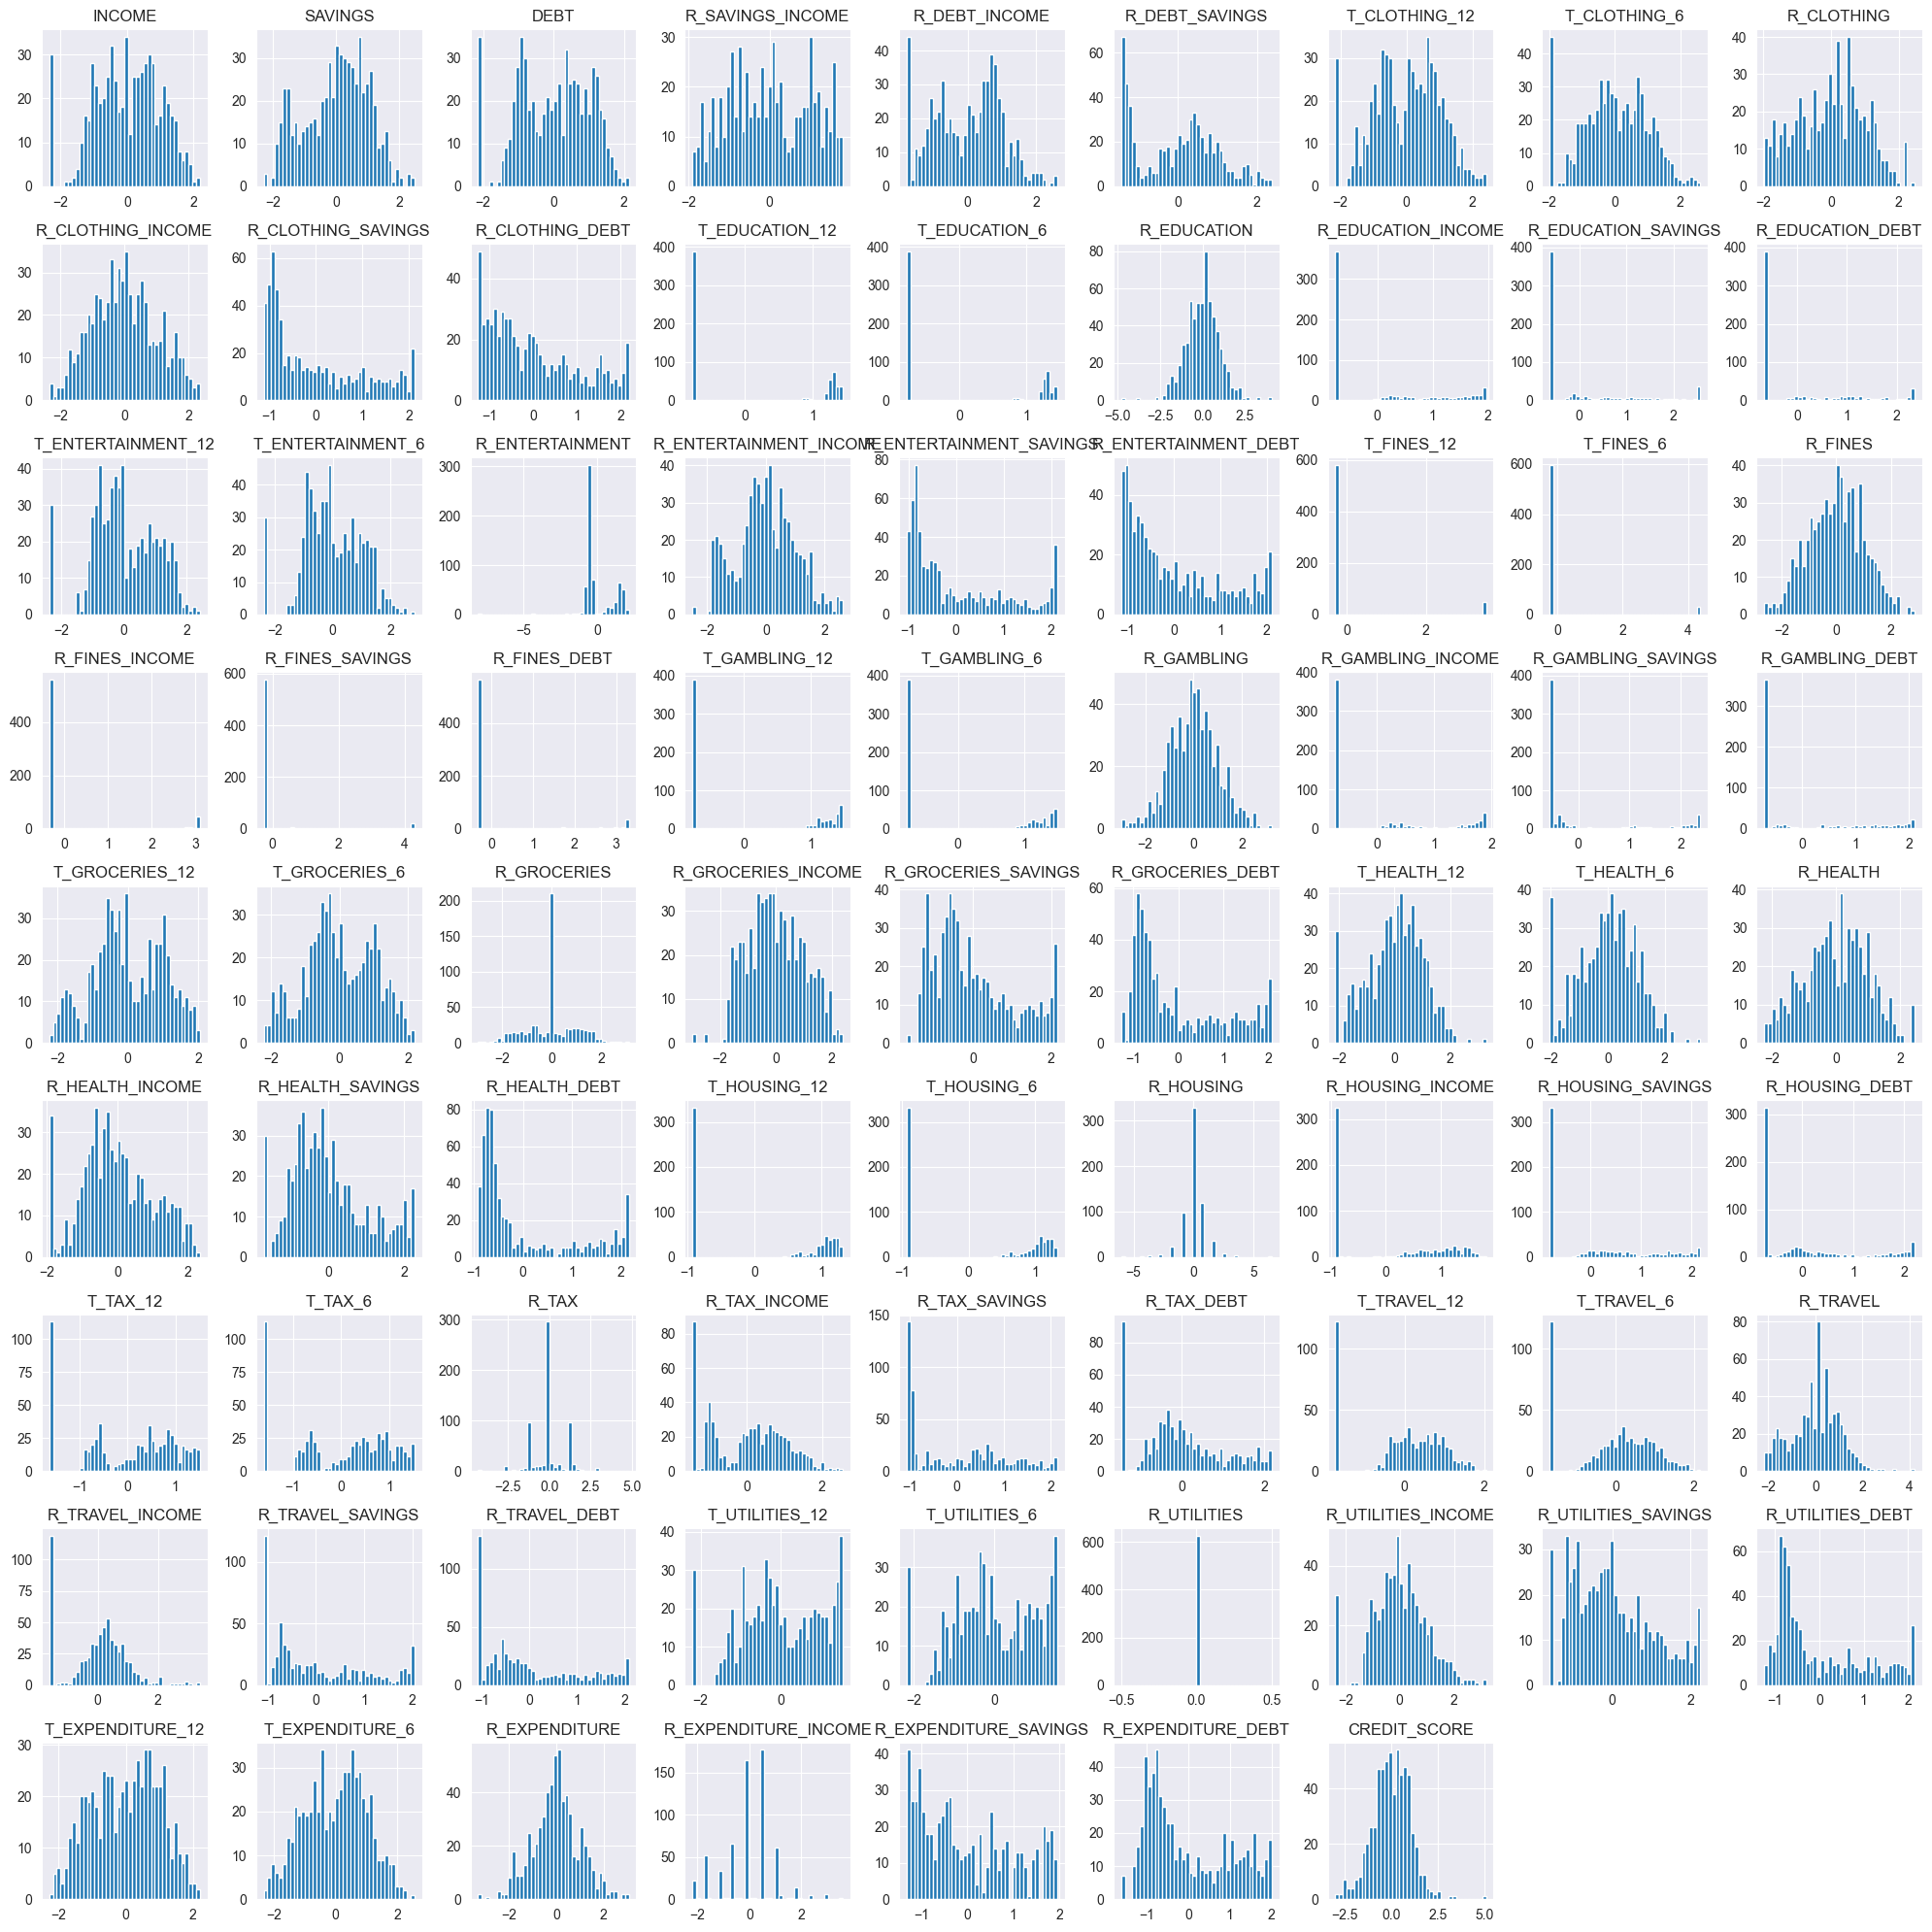

In [31]:
# do standard scaler for rest_cols
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_box_cox_woo[rest_cols] = scaler.fit_transform(df_box_cox_woo[rest_cols])

# histogram of rest_cols
df_box_cox_woo[rest_cols].hist(bins=40, figsize=(20, 20))
plt.tight_layout()
plt.show()

### Model Comparison - datasets
- Box Cox with outliers 
- Box Cox without outliers manually detected
- Box Cox without outliers PyOD detected
- Raw with outliers 
- Raw without outliers PyOD detected
- Raw without outliers manually detected

### Which Metric to Use?
- Accuracy is overall correct
- Recall is good for us because we may want to catch all the defaults (people who will not pay back the loan)
- Precision is good for us because we want to minimize the number of false positives (people who are not defaulting but we predict they will) in some cases it is more important than recall
- It depends on what we want to achieve

# Preliminary modeling
We have:
1. raw data
2. after box cox
3. with/without outliers 

In [131]:
# scores for every method dataframe - cross validation
scores = pd.DataFrame(columns=['method', 'accuracy_type', 'accuracy_score', 'variance'])

We will try different modells on our dfs (after/before deleting outliers and using box cox) to check if our data preprocessing gives us better or worse results.

1. Box Cox with outliers:

In [132]:
target="DEFAULT"
df_train=pd.read_csv('../data/for_modelling/credit_score_train.csv')
df_val=pd.read_csv('../data/for_modelling/credit_score_valid.csv')
# transform both train and valid datasets (BOX COX and Standard Scaler)
df_train2=df_train.copy()
df_val2=df_val.copy()
for col in rest_cols:
    df_train2[col] = boxcox(df_train2[col]+1)[0]
    df_val2[col] = boxcox(df_val2[col]+1)[0]
df_train2[rest_cols] = scaler.fit_transform(df_train2[rest_cols])
df_val2[rest_cols] = scaler.transform(df_val2[rest_cols])
# map CAT_GAMBLING (No-0, Low-1, High-2)
df_train2['CAT_GAMBLING'] = df_train2['CAT_GAMBLING'].map({'No':0, 'Low':1, 'High':2})
df_val2['CAT_GAMBLING'] = df_val2['CAT_GAMBLING'].map({'No':0, 'Low':1, 'High':2})

In [133]:
X=df_train2.drop(target, axis=1)
y=df_train2[target]

Dummy Classifier

In [134]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
# precision_score, recall_score, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
y_pred = dummy_clf.predict(df_val2.drop(target, axis=1))
acc=accuracy_score(df_val2[target], y_pred)
df_row=pd.DataFrame({'method':'Dummy_most_frequent', 'accuracy_type':'accuracy', 'accuracy_score':acc, 'variance':0}, index=[0])
scores=pd.concat([scores, df_row])
prec=precision_score(df_val2[target], y_pred)
df_row=pd.DataFrame({'method':'Dummy_most_frequent', 'accuracy_type':'precision', 'accuracy_score':prec, 'variance':0}, index=[0])
scores=pd.concat([scores, df_row])
rec=recall_score(df_val2[target], y_pred)
df_row=pd.DataFrame({'method':'Dummy_most_frequent', 'accuracy_type':'recall', 'accuracy_score':rec, 'variance':0}, index=[0])
scores=pd.concat([scores, df_row])
f1=f1_score(df_val2[target], y_pred)
df_row=pd.DataFrame({'method':'Dummy_most_frequent', 'accuracy_type':'f1', 'accuracy_score':f1, 'variance':0}, index=[0])
scores=pd.concat([scores, df_row])
dummy_clf = DummyClassifier(strategy="constant", constant=1)
dummy_clf.fit(X, y)
y_pred = dummy_clf.predict(df_val2.drop(target, axis=1))
acc=accuracy_score(df_val2[target], y_pred)
df_row=pd.DataFrame({'method':'Dummy_constant_1', 'accuracy_type':'accuracy', 'accuracy_score':acc, 'variance':0}, index=[0])
scores=pd.concat([scores, df_row])
prec=precision_score(df_val2[target], y_pred)
df_row=pd.DataFrame({'method':'Dummy_constant_1', 'accuracy_type':'precision', 'accuracy_score':prec, 'variance':0}, index=[0])
scores=pd.concat([scores, df_row])
rec=recall_score(df_val2[target], y_pred)
df_row=pd.DataFrame({'method':'Dummy_constant_1', 'accuracy_type':'recall', 'accuracy_score':rec, 'variance':0}, index=[0])
scores=pd.concat([scores, df_row])
f1=f1_score(df_val2[target], y_pred)
df_row=pd.DataFrame({'method':'Dummy_constant_1', 'accuracy_type':'f1', 'accuracy_score':f1, 'variance':0}, index=[0])
scores=pd.concat([scores, df_row])
scores

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


method accuracy_type  accuracy_score variance
0  Dummy_most_frequent      accuracy        0.717391        0
0  Dummy_most_frequent     precision        0.000000        0
0  Dummy_most_frequent        recall        0.000000        0
0  Dummy_most_frequent            f1        0.000000        0
0     Dummy_constant_1      accuracy        0.282609        0
0     Dummy_constant_1     precision        0.282609        0
0     Dummy_constant_1        recall        1.000000        0
0     Dummy_constant_1            f1        0.440678        0

SVC model

In [135]:
# SVC model
from sklearn.svm import SVC # another kernels than rbf and poly with 10 degrees are useless

model = SVC(random_state=42, kernel='poly')
model.fit(X, y)
y_pred = model.predict(df_val2.drop(target, axis=1))
accuracy_score(df_val2[target], y_pred)

0.2826086956521739

In [136]:
precision_score(df_val2[target], y_pred)

0.2826086956521739

In [137]:
recall_score(df_val2[target], y_pred)

1.0

In [138]:
f1_score(df_val2[target], y_pred)

0.4406779661016949

In [139]:
model = SVC(random_state=42, kernel='linear')
model.fit(X, y)
y_pred = model.predict(df_val2.drop(target, axis=1))
accuracy_score(df_val2[target], y_pred)

0.2826086956521739

In [140]:
model= SVC(gamma=2, C=1, random_state=42)
model.fit(X, y)
y_pred = model.predict(df_val2.drop(target, axis=1))
accuracy_score(df_val2[target], y_pred)

0.717391304347826

In [141]:
model_rbf = SVC(random_state=42, kernel='rbf')
model_rbf.fit(X, y)
y_pred = model_rbf.predict(df_val2.drop(target, axis=1))
accuracy_score(df_val2[target], y_pred)

0.717391304347826

In [142]:
model_poly = SVC(random_state=42, kernel='poly', degree=10)
model_poly.fit(X, y)
y_pred = model_poly.predict(df_val2.drop(target, axis=1))
accuracy_score(df_val2[target], y_pred)

0.717391304347826

In [143]:
np.mean(y_pred)

0.0

### Other kernels than rbf and poly with 10 degrees are useless
- we take into account only rbf and poly with 10 degrees
- cross validation for rbf and poly with 10 degrees

In [144]:
from sklearn.model_selection import cross_val_score
df_cross_val = pd.concat([df_train2, df_val2])
X=df_cross_val.drop(target, axis=1)
y=df_cross_val[target]
rbf_scores=cross_val_score(model_rbf, X, y, cv=10, scoring='accuracy')
df_row=pd.DataFrame({'method':'SVC_rbf_box_cox_with_outliers', 'accuracy_type':'accuracy', 'accuracy_score':rbf_scores.mean(), 'variance':rbf_scores.var()}, index=[0])
scores=pd.concat([scores, df_row])
rbf_scores=cross_val_score(model_rbf, X, y, cv=10, scoring="precision")
df_row=pd.DataFrame({'method':'SVC_rbf_box_cox_with_outliers', 'accuracy_type':'precision', 'accuracy_score':rbf_scores.mean(), 'variance':rbf_scores.var()}, index=[0])
scores=pd.concat([scores, df_row])
rbf_scores=cross_val_score(model_rbf, X, y, cv=10, scoring="recall")
df_row=pd.DataFrame({'method':'SVC_rbf_box_cox_with_outliers', 'accuracy_type':'recall', 'accuracy_score':rbf_scores.mean(), 'variance':rbf_scores.var()}, index=[0])
scores=pd.concat([scores, df_row])
rbf_scores=cross_val_score(model_rbf, X, y, cv=10, scoring="f1")
df_row=pd.DataFrame({'method':'SVC_rbf_box_cox_with_outliers', 'accuracy_type':'f1', 'accuracy_score':rbf_scores.mean(), 'variance':rbf_scores.var()}, index=[0])
scores=pd.concat([scores, df_row])
scores

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision 

method accuracy_type  accuracy_score  variance
0            Dummy_most_frequent      accuracy        0.717391         0
0            Dummy_most_frequent     precision        0.000000         0
0            Dummy_most_frequent        recall        0.000000         0
0            Dummy_most_frequent            f1        0.000000         0
0               Dummy_constant_1      accuracy        0.282609         0
0               Dummy_constant_1     precision        0.282609         0
0               Dummy_constant_1        recall        1.000000         0
0               Dummy_constant_1            f1        0.440678         0
0  SVC_rbf_box_cox_with_outliers      accuracy        0.716590  0.000021
0  SVC_rbf_box_cox_with_outliers     precision        0.000000       0.0
0  SVC_rbf_box_cox_with_outliers        recall        0.000000       0.0
0  SVC_rbf_box_cox_with_outliers            f1        0.000000       0.0

Random Forest model

In [47]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
y_pred = model.predict(df_val2.drop(target, axis=1))
accuracy_score(df_val2[target], y_pred)

0.6014492753623188

2. Box Cox without outliers (we'll delete outliers for train df)

In [48]:
# Definiowanie granic dla outlierów
outliers_dict = {
    'T_CLOTHING_6': 37000,
    'R_CLOTHING_SAVINGS': 1.50,
    'R_CLOTHING_DEBT': 1.0,
    'R_EDUCATION_SAVINGS': 1.7,
    'R_EDUCATION_DEBT': 0.3,
    'R_ENTERTAINMENT_INCOME': 1.2,
    'R_ENTERTAINMENT_SAVINGS': 6,
    'R_ENTERTAINMENT_DEBT': 2.0,
    'R_FINES_INCOME': 0.02,
    'R_FINES_SAVINGS': 0.05,
    'R_FINES_DEBT': 0.02,
    'R_GAMBLING_INCOME': 0.2,
    'R_GAMBLING_SAVINGS': 0.8,
    'R_GAMBLING_DEBT': 0.15,
    'R_GROCERIES_SAVINGS': 3.5,
    'T_HEALTH_12': 40000,
    'T_HEALTH_6': 25000,
    'R_HEALTH_INCOME': 0.3,
    'R_HEALTH_SAVINGS': 0.8,
    'R_HOUSING_DEBT': 3,
    'R_TAX_DEBT': 0.15
}

for col, threshold in outliers_dict.items():
    df_without_outliers_bc_train = df_train2[df_train2[col] <= threshold]

df_without_outliers_bc_train.reset_index(drop=True, inplace=True)
df_without_outliers_bc_train

INCOME   SAVINGS      DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
0    0.619996  0.577458  1.439124          0.130956       1.553292   
1    0.817704  1.623598  1.377102          0.985366       1.247825   
2    0.595037 -0.020955  0.861507         -0.544491       0.728279   
3    0.639110 -0.470106  0.824800         -1.091724       0.628010   
4    0.773380  1.625310  0.676118          1.027970       0.279616   
..        ...       ...       ...               ...            ...   
308 -0.805311  0.073590 -1.080262          1.349440      -1.176479   
309 -0.967598 -1.220451  0.160487         -0.798347       1.916246   
310  0.042250  1.340068 -0.367899          1.544719      -0.702088   
311  0.840432  1.250887  1.106586          0.624554       0.841425   
312  0.420570 -0.660180  0.396702         -1.175901       0.184151   

     R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  \
0          0.832731      -0.047917      0.356240    0.956257   
1          0.051701       0.205790      0.303502   -0.069508   
2          0.852186       0.527802      0.433736   -0.397748   
3          1.269785       1.436630      1.621757    1.021196   
4         -0.558965       0.521028      0.640860    0.198068   
..              ...            ...           ...         ...   
308       -1.279739      -0.860047     -0.308425    1.727215   
309        1.615881      -0.612525     -0.243081    0.582913   
310       -1.180194      -0.326573     -0.258194   -0.478309   
311        0.047313       0.587031      0.645190    0.052445   
312        1.095918       0.951649     -0.760120   -1.909047   

     R_CLOTHING_INCOME  ...  R_EXPENDITURE_SAVINGS  R_EXPENDITURE_DEBT  \
0            -1.121007  ...              -0.260731           -1.127503   
1            -0.893278  ...              -0.952011           -1.007798   
2             0.076292  ...               0.413988           -0.794487   
3             1.657935  ...               0.873646           -0.932200   
4            -0.220086  ...              -0.978246           -0.382531   
..                 ...  ...                    ...                 ...   
308          -0.651681  ...              -1.154654            1.536221   
309           0.775811  ...               1.065847           -1.153746   
310          -0.908676  ...              -1.244763            0.817954   
311          -0.191677  ...              -0.775283           -0.860543   
312           1.238277  ...               1.280243           -0.382531   

     CAT_GAMBLING  CAT_DEBT  CAT_CREDIT_CARD  CAT_MORTGAGE  \
0               0         1                1             1   
1               0         1                1             0   
2               0         1                0             0   
3               0         1                1             0   
4               2         1                0             0   
..            ...       ...              ...           ...   
308             1         1                0             0   
309             0         1                0             0   
310             0         1                0             0   
311             2         1                0             1   
312             2         1                0             0   

     CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  CREDIT_SCORE  DEFAULT  
0                      1               1     -1.130432        0  
1                      1               1     -0.680778        0  
2                      1               0     -0.466063        0  
3                      1               0     -0.173222        1  
4                      1               1     -0.695687        1  
..                   ...             ...           ...      ...  
308                    1               0     -0.305739        0  
309                    1               0     -2.176996        0  
310                    1               0      0.684931        0  
311                    1               1     -0.370573        0  
312                    1             

In [54]:
X2=df_without_outliers_bc_train.drop(target, axis=1)
y2= df_without_outliers_bc_train[target]

SVC

In [56]:
# SVC model
from sklearn.svm import SVC # another kernels than rbf and poly with 10 degrees are useless
from sklearn.metrics import accuracy_score
model = SVC(random_state=42, kernel='poly', degree=10)
model.fit(X2, y2)
y_pred = model.predict(df_val2.drop(target, axis=1))
accuracy_score(df_val2[target], y_pred)

0.717391304347826

Random Forest model

In [57]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X2, y2)
y_pred = model.predict(df_val2.drop(target, axis=1))
accuracy_score(df_val2[target], y_pred)

0.38405797101449274

3. Raw with outliers

In [59]:
X=df_train.drop(target, axis=1)
X_val=df_val.drop(target, axis=1)
X_val['CAT_GAMBLING'] = X_val['CAT_GAMBLING'].map({'No':0, 'Low':1, 'High':2})
# map CAT_GAMBLING (No-0, Low-1, High-2)
X['CAT_GAMBLING'] = X['CAT_GAMBLING'].map({'No':0, 'Low':1, 'High':2})
y=df_train[target]

SVC

In [60]:
# SVC model
from sklearn.svm import SVC # another kernels than rbf and poly with 10 degrees are useless
from sklearn.metrics import accuracy_score
model = SVC(random_state=42, kernel='poly', degree=10)
model.fit(X, y)
y_pred = model.predict(df_val2.drop(target, axis=1))
accuracy_score(df_val2[target], y_pred)

0.717391304347826

Forest model

In [61]:

model = RandomForestClassifier(random_state=42)
model.fit(X, y)
y_pred = model.predict(X_val)
accuracy_score(df_val[target], y_pred)

0.7101449275362319

4. raw without outliers

In [63]:
# Definiowanie granic dla outlierów
outliers_dict = {
    'T_CLOTHING_6': 37000,
    'R_CLOTHING_SAVINGS': 1.50,
    'R_CLOTHING_DEBT': 1.0,
    'R_EDUCATION_SAVINGS': 1.7,
    'R_EDUCATION_DEBT': 0.3,
    'R_ENTERTAINMENT_INCOME': 1.2,
    'R_ENTERTAINMENT_SAVINGS': 6,
    'R_ENTERTAINMENT_DEBT': 2.0,
    'R_FINES_INCOME': 0.02,
    'R_FINES_SAVINGS': 0.05,
    'R_FINES_DEBT': 0.02,
    'R_GAMBLING_INCOME': 0.2,
    'R_GAMBLING_SAVINGS': 0.8,
    'R_GAMBLING_DEBT': 0.15,
    'R_GROCERIES_SAVINGS': 3.5,
    'T_HEALTH_12': 40000,
    'T_HEALTH_6': 25000,
    'R_HEALTH_INCOME': 0.3,
    'R_HEALTH_SAVINGS': 0.8,
    'R_HOUSING_DEBT': 3,
    'R_TAX_DEBT': 0.15
}

for col, threshold in outliers_dict.items():
    df_without_outliers_train = df_train[df_train[col] <= threshold]

df_without_outliers_train.reset_index(drop=True, inplace=True)
df_without_outliers_train

INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
0      2783     1855        0            0.6665         0.0000   
1    314430   445442   707468            1.4167         2.2500   
2    161773   517674  2782496            3.2000        17.2000   
3     16014    97685    20818            6.1000         1.3000   
4    193225  1410542  2589215            7.3000        13.4000   
..      ...      ...      ...               ...            ...   
484   20007    22508   457665            1.1250        22.8752   
485   20846   268679    23162           12.8888         1.1111   
486   89235  1106514   160623           12.4000         1.8000   
487  197073  1021195  1863233            5.1818         9.4545   
488  133592    85013   680103            0.6364         5.0909   

     R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  \
0            0.0000            103            74      0.7184   
1            1.5882          35861         29157      0.8131   
2            5.3750           3716          2533      0.6816   
3            0.2131            637           187      0.2936   
4            1.8356           5276          2325      0.4407   
..              ...            ...           ...         ...   
484         20.3334           1451           861      0.5934   
485          0.0862           1302           533      0.4094   
486          0.1452           2413           835      0.3460   
487          1.8246           8416          3948      0.4691   
488          8.0000          12476           264      0.0212   

     R_CLOTHING_INCOME  ...  R_EXPENDITURE_SAVINGS  R_EXPENDITURE_DEBT  \
0               0.0370  ...                 2.5003              0.0000   
1               0.1141  ...                 0.5882              0.3704   
2               0.0230  ...                 0.3125              0.0581   
3               0.0398  ...                 0.1639              0.7692   
4               0.0273  ...                 0.1370              0.0746   
..                 ...  ...                    ...                 ...   
484             0.0725  ...                 1.1111              0.0546   
485             0.0625  ...                 0.0862              1.0000   
486             0.0270  ...                 0.0806              0.5556   
487             0.0427  ...                 0.1754              0.0962   
488             0.0934  ...                 1.4286              0.1786   

     CAT_GAMBLING  CAT_DEBT  CAT_CREDIT_CARD  CAT_MORTGAGE  \
0              No         0                0             0   
1            High         1                0             1   
2              No         1                1             1   
3              No         1                0             0   
4              No         1                1             0   
..            ...       ...              ...           ...   
484            No         1                0             0   
485           Low         1                0             0   
486            No         1                0             0   
487          High         1                0             1   
488          High         1                0             0   

     CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  CREDIT_SCORE  DEFAULT  
0                      1               0           570        0  
1                      1               0           691        0  
2                      1               1           520        0  
3                      1               0           654        0  
4                      1               1           552        0  
..                   ...             ...           ...      ...  
484                    1               0           423        0  
485                    1               0           584        0  
486                    1               0           631        0  
487                    1               1           572        0  
488                    1               0           610        0  

[489 rows x 86 c

In [69]:
X3=df_without_outliers_train.drop(target, axis=1)
y3= df_without_outliers_train[target]

X3['CAT_GAMBLING'] = X3['CAT_GAMBLING'].map({'No':0, 'Low':1, 'High':2})

SVC

In [70]:
# SVC model
from sklearn.svm import SVC # another kernels than rbf and poly with 10 degrees are useless
from sklearn.metrics import accuracy_score
model = SVC(random_state=42, kernel='poly', degree=10)
model.fit(X3, y3)
y_pred = model.predict(df_val2.drop(target, axis=1))
accuracy_score(df_val2[target], y_pred)

0.717391304347826

Random Forest 

In [71]:
model = RandomForestClassifier(random_state=42)
model.fit(X3, y3)
y_pred = model.predict(X_val)
accuracy_score(df_val[target], y_pred)

0.6956521739130435

For SVC data processing and transformation doesn't change accuracy_score, with RandomForestClassifier the accuracy_score is the highest when withour transormation.